In [1]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, gluon, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

In [2]:
#creat dataset
n_train = 100
n_test = 100
true_w = [1.2, -3.4, 5.6]
true_b = 5
features = nd.random.normal(shape=(n_train+n_test, 1))
poly_features = nd.concat(features, nd.power(features, 2), 
                         nd.power(features, 3))
#y = 1.2x -3.4x*x + 5.6x*x*x + 5 +e(error)
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
         + true_w[2] * poly_features[:, 2] + true_b)
labels += nd.random.normal(scale=0.1, shape=labels.shape)

In [3]:
features[:2], poly_features[:2], labels[:2]

(
 [[2.2122064]
  [0.7740038]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 2.2122064   4.893857   10.826221  ]
  [ 0.7740038   0.5990819   0.46369165]]
 <NDArray 2x3 @cpu(0)>, 
 [51.674885   6.3585763]
 <NDArray 2 @cpu(0)>)

In [4]:
#define draw function
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
            legend=None, figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)

In [5]:
#define  fit and plot
num_epochs = 100
loss =gloss.L2Loss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize()
    batch_size = min(10, train_labels.shape[0])
    train_iter = gdata.DataLoader(gdata.ArrayDataset(
        train_features, train_labels), batch_size, shuffle=True)
    trainer = gluon.Trainer(net.collect_params(), 'sgd',
                            {'learning_rate': 0.01})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        train_ls.append(loss(net(train_features), 
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                           test_labels).mean().asscalar())
    print('final epoch: train loss', train_ls[-1], 
            'test loss', test_ls[-1])
    semilogy(range(1, num_epochs+1), train_ls, 'epochs', 'loss',
            range(1, num_epochs+1), test_ls, ['train', 'test'])
    print('weight:', net[0].weight.data().asnumpy(),
            '\nbias:', net[0].bias.data().asnumpy())
        

final epoch: train loss 0.0068677496 test loss 0.01111518
weight: [[ 1.3211746 -3.3641777  5.563905 ]] 
bias: [4.9521585]


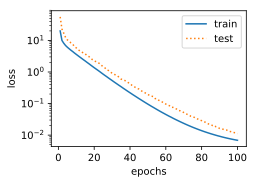

In [6]:
#
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :],
            labels[:n_train], labels[n_train:])

final epoch: train loss 43.997734 test loss 160.69058
weight: [[15.56916]] 
bias: [2.2784765]


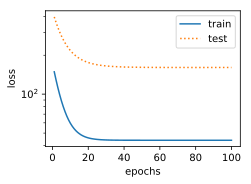

In [8]:
#underfit
fit_and_plot(features[:n_train, :], features[n_train:, :],
            labels[:n_train], labels[n_train:])

final epoch: train loss 0.4141868 test loss 103.500305
weight: [[1.3426857 1.9402363 3.5155578]] 
bias: [1.2431266]


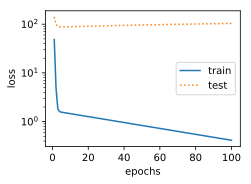

In [10]:
#overfit
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],
            labels[0:2], labels[n_train:])